<a href="https://colab.research.google.com/github/NivedhaBalakrishnan/Data-Science-Protfolio/blob/main/Time%20Series%20Forecasting%20using%20LSTM/Time_Series_Forecasting_Using_Deep_Learning_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mounting Colab

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Imports
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


from keras.layers import LSTM
from keras.layers import Dense
from keras.models import Sequential

%matplotlib inline

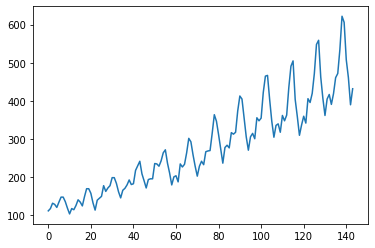

In [4]:
dataset = pd.read_csv('/content/drive/Shareddrives/Interview Preparation/Data Science/LSTM Time Forecasting/Data/international-airline-passengers.csv',usecols=[1],engine='python',skipfooter=3)
plt.plot(dataset)
plt.show()

In [6]:
# for reproducability of the results let's fix the seed function
np.random.seed(1234)
dataset.head()

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,112
1,118
2,132
3,129
4,121


In [7]:
dataset = dataset.values
dataset = dataset.astype('float32')

In [8]:
# normaliza the dataset
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)

In [9]:
dataset

array([[0.01544401],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984557],
       [0.08494207],
       [0.08494207],
       [0.06177607],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123553],
       [0.04247104],
       [0.07142857],
       [0.05984557],
       [0.04054055],
       [0.08687258],
       [0.12741312],
       [0.12741312],
       [0.10424709],
       [0.05598456],
       [0.01930502],
       [0.06949806],
       [0.07915059],
       [0.08880308],
       [0.14285713],
       [0.11389962],
       [0.13127413],
       [0.14285713],
       [0.18339768],
       [0.18339768],
       [0.15444016],
       [0.11196911],
       [0.08108109],
       [0.1196911 ],
       [0.12934363],
       [0.14671814],
       [0.17181468],
       [0.14864865],
       [0.15250966],
       [0.22007722],
       [0.24324325],
       [0.26640925],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

In [10]:
# split the dataset into train and test 
train_size = int(len(dataset)*0.67)

In [11]:
print(train_size)

96


In [12]:
test_size = len(dataset) - train_size

In [13]:
print(test_size)

48


In [14]:
train,test = dataset[0:train_size,:],dataset[train_size:len(dataset),:]

In [15]:
print (len(train), len(test))

96 48


In [16]:
# create dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back),0]
        dataX.append(a)
        dataY.append(dataset[i+look_back,0])
    return np.array(dataX),np.array(dataY)

In [17]:
#reshape the dataset X =current time, and Yt+1 =future time period
look_back =1
trainX, trainY = create_dataset(train,look_back)
testX, testY = create_dataset(test,look_back)

In [18]:
trainX = np.reshape(trainX,(trainX.shape[0],1,trainX.shape[1]))
testX = np.reshape(testX,(testX.shape[0],1,testX.shape[1]))

In [19]:
print(testX)

[[[0.4073359 ]]

 [[0.3803089 ]]

 [[0.48648646]]

 [[0.47104248]]

 [[0.484556  ]]

 [[0.6138996 ]]

 [[0.6969112 ]]

 [[0.70077217]]

 [[0.57915056]]

 [[0.46911195]]

 [[0.38803086]]

 [[0.44787642]]

 [[0.45559844]]

 [[0.4131274 ]]

 [[0.4980695 ]]

 [[0.47104248]]

 [[0.49999997]]

 [[0.6389961 ]]

 [[0.7471043 ]]

 [[0.7741313 ]]

 [[0.57915056]]

 [[0.492278  ]]

 [[0.3976834 ]]

 [[0.44980696]]

 [[0.49420848]]

 [[0.45945945]]

 [[0.5830116 ]]

 [[0.5637065 ]]

 [[0.61003864]]

 [[0.71042466]]

 [[0.8571429 ]]

 [[0.8783784 ]]

 [[0.69305015]]

 [[0.5849421 ]]

 [[0.4980695 ]]

 [[0.58108103]]

 [[0.6042471 ]]

 [[0.554054  ]]

 [[0.60810804]]

 [[0.6891892 ]]

 [[0.71042466]]

 [[0.8320464 ]]

 [[1.        ]]

 [[0.96911204]]

 [[0.7799227 ]]

 [[0.6891892 ]]]


In [20]:
# let's create  a RNN or LSTM model
model = Sequential()
model.add(LSTM(4,input_shape=(1,look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

# fit the model
model.fit(trainX,trainY,batch_size=1,verbose=2)

94/94 - 2s - loss: 0.0376 - 2s/epoch - 21ms/step


In [21]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

2/2 [==============================] - 0s 4ms/step


In [22]:
print(trainPredict)

[[0.11135438]
 [0.11234487]
 [0.11468257]
 [0.11417851]
 [0.11284269]
 [0.11518833]
 [0.1173996 ]
 [0.1173996 ]
 [0.1153573 ]
 [0.11251062]
 [0.11004438]
 [0.11234487]
 [0.11184877]
 [0.11367615]
 [0.11620496]
 [0.11518833]
 [0.11350908]
 [0.11757103]
 [0.12121418]
 [0.12121418]
 [0.11912225]
 [0.11485097]
 [0.11168379]
 [0.11603504]
 [0.11688649]
 [0.11774263]
 [0.12262376]
 [0.1199906 ]
 [0.12156545]
 [0.12262376]
 [0.12638052]
 [0.12638052]
 [0.12368876]
 [0.11981656]
 [0.11705734]
 [0.12051387]
 [0.12138972]
 [0.12297801]
 [0.12529883]
 [0.12315542]
 [0.12351079]
 [0.12984967]
 [0.13207483]
 [0.13432616]
 [0.12819813]
 [0.12493972]
 [0.12156545]
 [0.12547863]
 [0.12583883]
 [0.12583883]
 [0.13319723]
 [0.1330097 ]
 [0.1318884 ]
 [0.13451496]
 [0.13852105]
 [0.14006793]
 [0.13338493]
 [0.12856385]
 [0.12297801]
 [0.12674257]
 [0.12728702]
 [0.12440249]
 [0.1330097 ]
 [0.1315161 ]
 [0.13282236]
 [0.13852105]
 [0.14596932]
 [0.14418232]
 [0.13756004]
 [0.1318884 ]
 [0.12710536]
 [0.13

In [23]:
print(testPredict)

[[0.14857534]
 [0.14577006]
 [0.15698324]
 [0.15532044]
 [0.15677482]
 [0.17109932]
 [0.18066247]
 [0.18111397]
 [0.1671804 ]
 [0.15511334]
 [0.1465681 ]
 [0.15284632]
 [0.15366834]
 [0.14918086]
 [0.15823734]
 [0.15532044]
 [0.15844692]
 [0.17396092]
 [0.1865776 ]
 [0.18980259]
 [0.1671804 ]
 [0.15760955]
 [0.14756958]
 [0.15305158]
 [0.15781863]
 [0.15408035]
 [0.16761333]
 [0.16545506]
 [0.17066139]
 [0.18224537]
 [0.19987558]
 [0.2024916 ]
 [0.18021151]
 [0.16783004]
 [0.15823734]
 [0.16739678]
 [0.17000565]
 [0.1643819 ]
 [0.17044264]
 [0.17976116]
 [0.18224537]
 [0.1968042 ]
 [0.21776137]
 [0.2138387 ]
 [0.19049722]
 [0.17976116]]


In [24]:
# reverse the predicted values to thee actual time series values using inverse tranform function
trainPredict = scaler.inverse_transform(trainPredict) 
testPredict = scaler.inverse_transform(testPredict)

trainY = scaler.inverse_transform([trainY])
testY = scaler.inverse_transform([testY])

In [25]:
print(trainPredict, trainY)

[[161.68156]
 [162.19464]
 [163.40558]
 [163.14447]
 [162.45251]
 [163.66756]
 [164.81299]
 [164.81299]
 [163.75508]
 [162.2805 ]
 [161.00299]
 [162.19464]
 [161.93767]
 [162.88425]
 [164.19417]
 [163.66756]
 [162.79771]
 [164.9018 ]
 [166.78894]
 [166.78894]
 [165.70532]
 [163.4928 ]
 [161.8522 ]
 [164.10616]
 [164.54721]
 [164.99068]
 [167.51912]
 [166.15514]
 [166.9709 ]
 [167.51912]
 [169.46512]
 [169.46512]
 [168.07077]
 [166.06499]
 [164.63571]
 [166.4262 ]
 [166.87987]
 [167.7026 ]
 [168.9048 ]
 [167.79451]
 [167.97859]
 [171.26213]
 [172.41476]
 [173.58095]
 [170.40663]
 [168.71877]
 [166.9709 ]
 [168.99792]
 [169.18452]
 [169.18452]
 [172.99615]
 [172.89903]
 [172.3182 ]
 [173.67874]
 [175.7539 ]
 [176.55519]
 [173.09338]
 [170.59607]
 [167.7026 ]
 [169.65265]
 [169.93466]
 [168.44049]
 [172.89903]
 [172.12534]
 [172.80199]
 [175.7539 ]
 [179.6121 ]
 [178.68645]
 [175.2561 ]
 [172.3182 ]
 [169.84058]
 [172.3182 ]
 [173.58095]
 [172.70503]
 [176.05368]
 [176.25401]
 [176.35432]

In [26]:
print(testPredict, testY)

[[180.96202]
 [179.50888]
 [185.3173 ]
 [184.456  ]
 [185.20935]
 [192.62946]
 [197.58316]
 [197.81705]
 [190.59944]
 [184.34871]
 [179.92227]
 [183.1744 ]
 [183.6002 ]
 [181.27568]
 [185.96695]
 [184.456  ]
 [186.07552]
 [194.11176]
 [200.64719]
 [202.31775]
 [190.59944]
 [185.64175]
 [180.44104]
 [183.28072]
 [185.75006]
 [183.81363]
 [190.8237 ]
 [189.70573]
 [192.4026 ]
 [198.4031 ]
 [207.53554]
 [208.89066]
 [197.34956]
 [190.93596]
 [185.96695]
 [190.71153]
 [192.06293]
 [189.14983]
 [192.28929]
 [197.11627]
 [198.4031 ]
 [205.94458]
 [216.80038]
 [214.76845]
 [202.67757]
 [197.11627]] [[301.00001152 355.999993   348.00001085 355.00000681 421.9999924
  465.0000161  466.99998848 403.99999397 346.99999379 304.99998716
  335.99999132 339.99999783 317.99999288 362.00000277 348.00001085
  362.99998896 434.99999813 491.00002756 505.00001948 403.99999397
  359.00001333 310.00001073 337.00000838 359.99999952 342.00000109
  406.0000281  395.99998094 420.00002002 471.99998119 548.00004318


In [27]:
# calculate the RMSE root mean square error
trainScore = math.sqrt(mean_squared_error(trainY[0],trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))

Train Score: 77.34 RMSE


In [28]:
testScore = math.sqrt(mean_squared_error(testY[0],testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Test Score: 234.24 RMSE


92/92 - 2s - loss: 0.0423 - 2s/epoch - 19ms/step
2/2 [==============================] - 0s 4ms/step
Train Score: 84.57 RMSE
Test Score: 253.66 RMSE


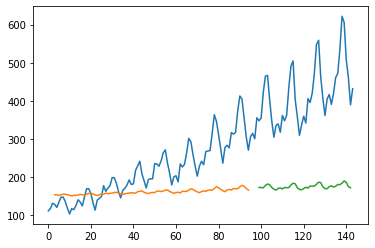

In [29]:
# LSTM for international airline passengers problem with window regression framing
# convert an array of values into a dataset matrix

def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)
# fix random seed for reproducibility
np.random.seed(7)
# load the dataset
dataframe = pd.read_csv('/content/drive/Shareddrives/Interview Preparation/Data Science/LSTM Time Forecasting/Data/international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()